In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
linestyles = ['-', '--', ':']

def E(X, g = lambda x : x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g = lambda x : x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set,f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability' # 확률은 0이상 1미만/ assert: 조건의 참거짓을 판단해 거짓이면 메세지가 뜨고 중단
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probablity{prob_sum}' # 확률의 총합 1
    print(f'기댓값: {E(X): .4}')
    print(f'분  산: {V(X): .4}')

def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set,prob,label='prob')
    ax.vlines(E(X),0,1,label='mean')
    ax.set_xticks(np.append(x_set,E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()
    plt.show()

In [3]:
# 베르누이 분포
# X~Bern(p)이라 할 때, 기댓값: E(X) = p, 분산: V(X) = p(1-p)

In [4]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
    return x_set,f

In [5]:
p = 0.3
X = Bern(p)

In [6]:
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [7]:
check_prob(X)

기댓값:  0.3
분  산:  0.21


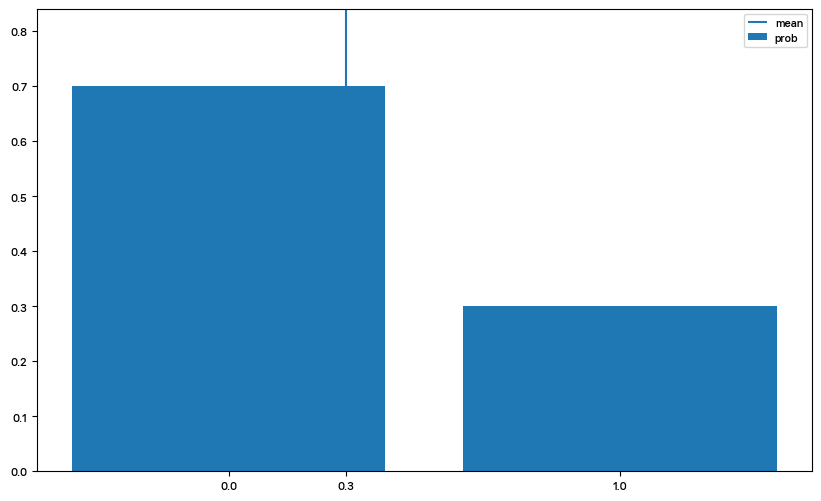

In [8]:
plot_prob(X)

In [ ]:
# scipy.stats의 베르누이 함수는 베르누이 분포를 따름
# pmf메서드는 확률함수 계산
# cdf메서드는 누적밀도함수 계산

In [13]:
p = 0.3
rv = stats.bernoulli(p)

In [15]:
rv.pmf(1)

0.3

In [16]:
rv.pmf([0,1])

array([0.7, 0.3])

In [17]:
rv.cdf([0,1])

array([0.7, 1. ])

In [18]:
rv.mean()

0.3

In [19]:
rv.var()

0.21

In [ ]:
# 이항분포: 성공 확률이 p인 베르누이 시행을 n번 했을 때, 성공 횟수가 따르는 분포
# X~Bin(n, p)이라 할 때, 기댓값: E(X) = np, 분산: V(X) = np(1-p)

In [21]:
from scipy.special import comb

In [22]:
def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [23]:
n = 10
p = 0.3
X = Bin(n, p)

In [24]:
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [25]:
check_prob(X)

기댓값:  3.0
분  산:  2.1


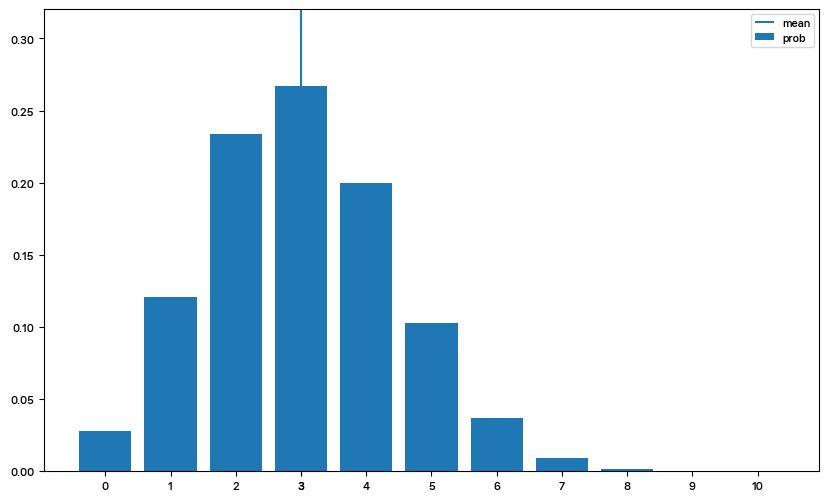

In [26]:
plot_prob(X)

In [28]:
# 기하분포: 베르누이 시행에서 처음 성공할 때까지 반복한 시행횟수가 따르는 분포
# X~Ge(p)이라 할 때, E(X) = 1/p, V(X) = (1-p) / P**2

In [29]:
# 포아송분포: 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포
# X~Poi(λ)이라 할 때, E(X) = λ, V(X) = (λ)